A notebook for exploring initial model fitting results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

from janelia_core.stats.regression import visualize_coefficient_stats

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib notebook

## Parameters 

In [4]:
rs_folder = r'A:\projects\keller_vnc\results\single_subject\debug'
rs_file = r'all_supervoxels_20220414092359891131.pkl'

In [5]:
before_beh = 'beh_before_F'
beh = 'beh_F'

alpha = .05

## Helper functions 

In [6]:
def find(seq, vl):
    i = None
    for cand_i, v in enumerate(seq):
        if v == vl:
            i = cand_i
            break
    return i

## Load results 

In [7]:
with open(Path(rs_folder) / rs_file, 'rb') as f:
    rs = pickle.load(f)

In [55]:
## Find a voxel where we had significant encoding of both before and after behaviors 

before_ind = find(rs['var_names'], before_beh)
after_ind = find(rs['var_names'], beh)

full_stats = rs['full_stats']
n_voxels = len(full_stats)
voxel_i = 10000
for i in range(n_voxels):
    if ((full_stats[i]['non_zero_p_corrected_by'][before_ind] < alpha) 
          and (full_stats[i]['non_zero_p_corrected_by'][after_ind] < alpha)):
        voxel_i = i
        break

## Visualize the model fit for the current voxel 

<IPython.core.display.Javascript object>


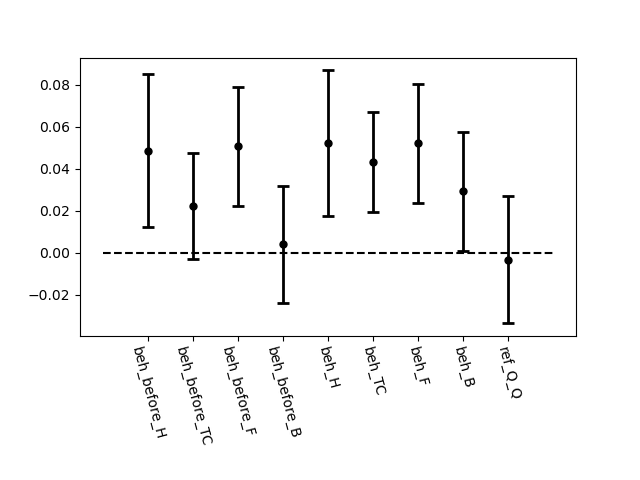

a:\keller_drive\projects\janelia_core\janelia_core\stats\regression.py:896: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(v_i + 1, theta[v_i], 'ko', markersize=theta_size, color=var_clrs[v_i,:])


In [56]:
visualize_coefficient_stats(var_strs=rs['var_names'], theta=full_stats[voxel_i]['beta'], 
                            c_ints=full_stats[voxel_i]['c_ints'])
plt.gcf().subplots_adjust(bottom=.3)

## Look at mean activity for all transitions for this voxel 

In [57]:
mean_trans = rs['mean_trans_vls'].keys()
mean_trans_vls = [rs['mean_trans_vls'][k][voxel_i] for k in mean_trans]
mean_trans_lbls = [t[0] + '_' + t[1] for t in mean_trans]

In [58]:
pred_vls = [None]*len(mean_trans_vls)

qq_vl = full_stats[voxel_i]['beta'][find(rs['var_names'], 'ref_Q_Q')]

for t_i, t in enumerate(mean_trans):
    before_ind = find(rs['var_names'], 'beh_before_' + t[0])
    if before_ind is not None:
        before_vl = full_stats[voxel_i]['beta'][before_ind]
    else:
        before_vl = 0
    
    after_ind = find(rs['var_names'], 'beh_' + t[1])
    if after_ind is not None:
        after_vl = full_stats[voxel_i]['beta'][after_ind]
    else:
        after_vl = 0
        
    pred_vls[t_i] = qq_vl + before_vl + after_vl

<IPython.core.display.Javascript object>


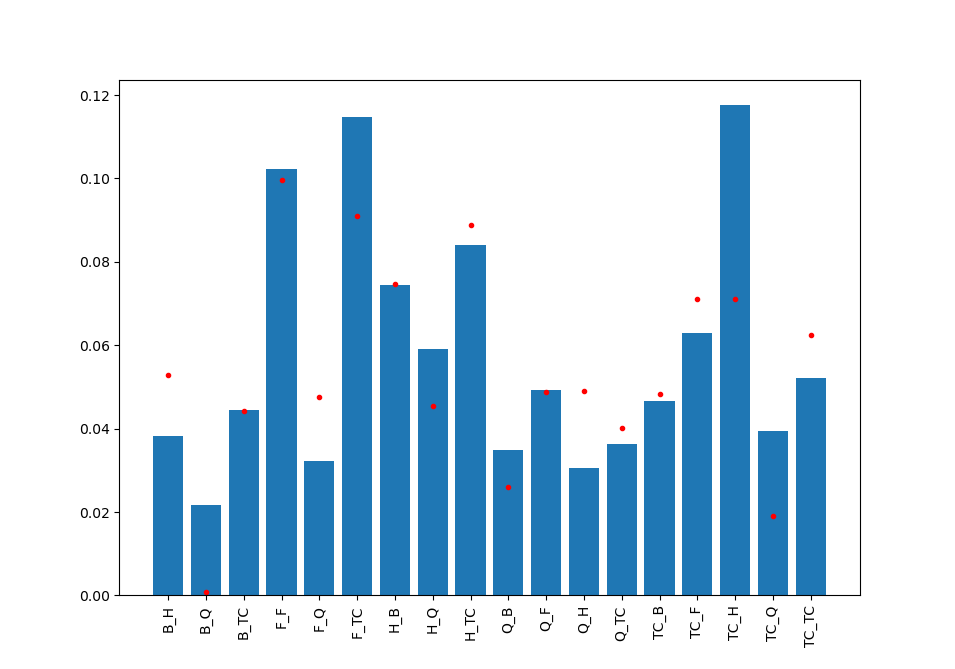

[Text(0, 0, 'B_H'),
 Text(1, 0, 'B_Q'),
 Text(2, 0, 'B_TC'),
 Text(3, 0, 'F_F'),
 Text(4, 0, 'F_Q'),
 Text(5, 0, 'F_TC'),
 Text(6, 0, 'H_B'),
 Text(7, 0, 'H_Q'),
 Text(8, 0, 'H_TC'),
 Text(9, 0, 'Q_B'),
 Text(10, 0, 'Q_F'),
 Text(11, 0, 'Q_H'),
 Text(12, 0, 'Q_TC'),
 Text(13, 0, 'TC_B'),
 Text(14, 0, 'TC_F'),
 Text(15, 0, 'TC_H'),
 Text(16, 0, 'TC_Q'),
 Text(17, 0, 'TC_TC')]

In [59]:
plt.figure()
ax = plt.subplot(1,1,1)
ax.bar(range(len(mean_trans_vls)), mean_tran_vls)
ax.plot(range(len(mean_trans_vls)), pred_vls, 'r.')
ax.set_xticks(range(len(mean_trans_vls)))
ax.set_xticklabels(mean_trans_lbls, rotation='vertical', fontsize=10)

In [12]:
beh_trans = rs['beh_trans']

In [13]:
rs.keys()

dict_keys(['ps', 'full_stats', 'beh_trans', 'var_names', 'n_subjs_per_trans', 'n_trans', 'mean_trans_vls'])

In [14]:
beh_trans

[('B', 'H'),
 ('B', 'Q'),
 ('B', 'TC'),
 ('F', 'F'),
 ('F', 'Q'),
 ('F', 'TC'),
 ('H', 'B'),
 ('H', 'Q'),
 ('H', 'TC'),
 ('Q', 'B'),
 ('Q', 'F'),
 ('Q', 'H'),
 ('Q', 'TC'),
 ('TC', 'B'),
 ('TC', 'F'),
 ('TC', 'H'),
 ('TC', 'Q'),
 ('TC', 'TC')]